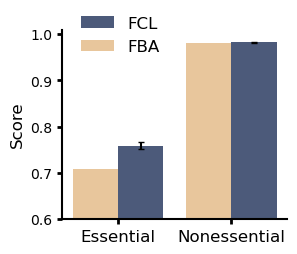

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import matplotlib

# Get colors from lipari colormap for plotting
yellow = cmaps.lipari[225].colors  # Yellow color for FBA bars
blue = cmaps.lipari[60].colors     # Blue color for FCL bars
colors = [yellow, blue]            # List of colors for plotting

# Define metrics to analyze
metrics = ['Essential', 'Nonessential']

# Load data from CSV and separate by model type
df = pd.read_csv('fig2ab.csv')
rf_data = df[df['label'] == 'Random Forest']   # Random Forest/FCL data
fba_data = df[df['label'] == 'FBA']           # FBA data

# Calculate mean and standard error for Random Forest results
rf_means = rf_data[metrics].mean()
rf_stds = rf_data[metrics].sem()

# Get FBA values (single row since FBA has one set of results)
fba_values = fba_data[metrics].iloc[0]

# Create figure and axis with specified size
fig, ax = plt.subplots(figsize=(3.07, 2.67))
x = np.arange(len(metrics))
width = 0.4  # Width of bars

# Plot Random Forest/FCL bars with error bars
ax.bar(x + width, rf_means, width, yerr=rf_stds, capsize=2, label='FCL', color=blue)

# Plot FBA bars
ax.bar(x, fba_values, width, label='FBA', color=yellow)

# Set y-axis label and font size
ax.set_ylabel("Score", fontsize=12)

# Set x-axis ticks and labels
ax.set_xticks(x+width/2)
ax.set_xticklabels(['Essential', 'Nonessential'])
ax.set_ylim([0.6, 1.01])

# Customize plot appearance by removing top and right spines
# and thickening left and bottom spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Set tick parameters for both axes
ax.xaxis.set_tick_params(width=2, labelsize=12)
ax.yaxis.set_tick_params(width=2, labelsize=10)

# Adjust x-tick label rotation and alignment
plt.xticks(rotation=0, ha="center")

# Add and customize legend
legend = plt.legend(ncols=1, loc='upper right', bbox_to_anchor=(0.5, 1.15), fontsize=12)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_linewidth(0.0)

# Adjust layout to prevent label cutoff
fig.tight_layout()
